# ROLL NO: 41251
# NAME   : PRANJAL PATIL
# TOPIC  -: IMAGE COLORIZATION

In [13]:
!pip install -q kaggle

You should consider upgrading via the 'D:\Anaconda\python.exe -m pip install --upgrade pip' command.


In [14]:
#from google.colab import files
#files.upload()

In [15]:
!pip install opendatasets
!pip install pandas

You should consider upgrading via the 'D:\Anaconda\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\Anaconda\python.exe -m pip install --upgrade pip' command.


In [3]:

import opendatasets as od
import pandas
 
od.download(
    "https://www.kaggle.com/datasets/aayush9753/image-colorization-dataset")

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [ ]:
!kaggle datasets download -d aayush9753/image-colorization-dataset

In [ ]:
!unzip data.zip

LIBRARIES

In [2]:
import skimage
from PIL import Image
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.util import crop, pad
from skimage.morphology import label
from skimage.color import rgb2gray, gray2rgb, rgb2lab, lab2rgb
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D
from keras.layers import Activation, Dense, Dropout, Flatten, InputLayer
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
from keras.models import Sequential
from tensorflow.keras.utils import img_to_array
#from tensorflow.keras.utils import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf
# Loading images
X = np.zeros((5000, 256, 256, 3), dtype=np.uint8)
k=0
for filename in os.listdir('data/data/train_color'):
    img= imread('data/data/train_color/'+filename)
    img= resize(img, (256, 256), mode= 'constant', preserve_range= True)
    X[k]=(img)
    print(k)
    k=k+1
    

In [4]:
model = Sequential()
model.add(InputLayer(input_shape=(256, 256, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))
# Finish model
model.compile(optimizer='adam', loss='mse')
# Image transformer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 256)       295168    
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 512)       1

TRAINING DATA

In [6]:
from keras.preprocessing.image import ImageDataGenerator
split = int(0.95*len(X))
Xtrain = X[:split]
Xtrain = Xtrain.astype('float32')/255

# Image transformer
datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=20,
        horizontal_flip=True)
# Generate training data
batch_size = 50
def image_a_b_gen(batch_size):
    for batch in datagen.flow(Xtrain, batch_size=batch_size):
        lab_batch = rgb2lab(batch)
        X_batch = lab_batch[:,:,:,0]
        Y_batch = lab_batch[:,:,:,1:] / 128
        yield (X_batch.reshape(X_batch.shape+(1,)), Y_batch)

TensorBoard(log_dir='/output')

model.fit(image_a_b_gen(batch_size), steps_per_epoch=70, epochs=1)
#Saving the neural network model
model.save('model_70.h5')

70/70 [==============================] - 1291s 18s/step - loss: 0.0782


LOADING MODEL

In [6]:
from keras.models import load_model

model = load_model('model_70.h5') 

TESTING DATA

In [7]:
split = int(0.95*5000)
Xtest = rgb2lab(1.0/255*X[split:])[:,:,:,0]
Xtest = Xtest.reshape(Xtest.shape+(1,))
Ytest = rgb2lab(1.0/255*X[split:])[:,:,:,1:]
Ytest = Ytest / 128
batch_size = 50

print (model.evaluate(Xtest, Ytest, batch_size=batch_size))
# Load black and white images
color_me = np.zeros((739, 256, 256, 3), dtype=np.uint8)
k=0
for filename in os.listdir('data/data/test_black/'):
    img= imread('data/data/test_black/'+filename)
    img= resize(img, (256, 256), mode= 'constant', preserve_range= True)
    color_me[k]=(img)
    k= k+1
color_me = np.array(color_me, dtype=float)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))
# Test model
output = model.predict(color_me)
output = output * 128
# Output colorizations
for i in range(len(output)):
        cur = np.zeros((256, 256, 3))
        cur[:,:,0] = color_me[i][:,:,0]
        cur[:,:,1:] = output[i]
        imsave("data/data/result_70/img_"+str(i)+".png", lab2rgb(cur))
        
        

5/5 [==============================] - 18s 3s/step - loss: 0.0138
0.013787003234028816


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

BLACK AND WHITE IMAGE


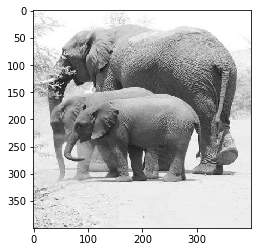

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


COLOR IMAGE


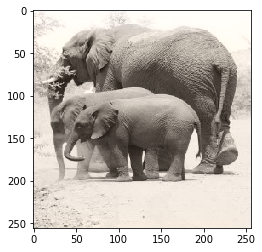

In [29]:
from keras.layers import Conv2D, UpSampling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import tensorflow as tf
import cv2

from matplotlib import pyplot as plt

img1_color=[]
img1=img_to_array(load_img('Desktop/test_black/image5511.jpg'))
k= load_img('Desktop/test_black/image5511.jpg')
img1 = resize(img1 ,(256,256))
print("BLACK AND WHITE IMAGE")
plt.imshow(k, interpolation='nearest')
plt.show()
img1_color.append(img1)
img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))
output1 = model.predict(img1_color)
output1 = output1*128
result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]
print("COLOR IMAGE")
imsave("result.png", lab2rgb(result))
plt.imshow(lab2rgb(result), interpolation='nearest')
plt.show()